In [1]:
import pandas as pd
import gmplot
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics


df = pd.read_csv("housing.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [2]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [3]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace = True)

In [4]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


In [5]:
corr_matrix = df.corr()

In [6]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We can see total bedrooms has a very low correlation with median income so we just impute the mean to fill nas

In [8]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean,inplace = True)

In [9]:
latitudes = df["latitude"]
longitudes = df["longitude"]

In [10]:
gmap = gmplot.GoogleMapPlotter(37.88, -122.23, 10)
gmap.heatmap(latitudes, longitudes)

In [11]:
gmap.draw("my_heatmap.html")

D:\anacoda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


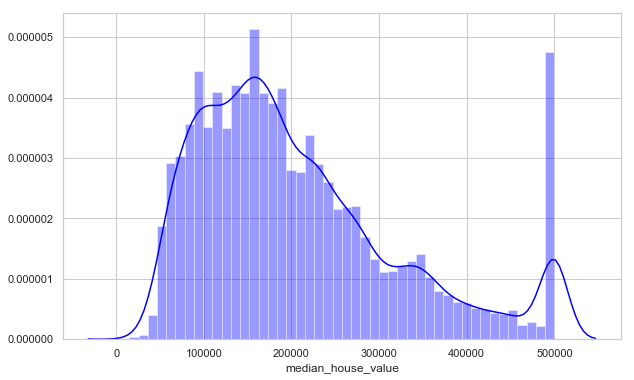

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'],color='blue')
plt.show()

We can see the distribution of our target variable to right skewed and not normal

D:\anacoda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


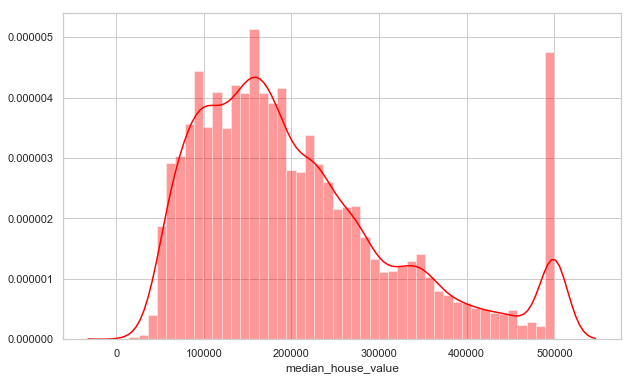

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'],color='red')
plt.show()

D:\anacoda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


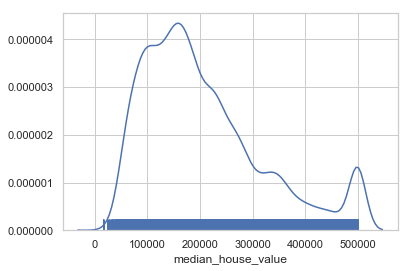

In [14]:
ax = sns.distplot(df['median_house_value'], rug=True, hist=False)

D:\anacoda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


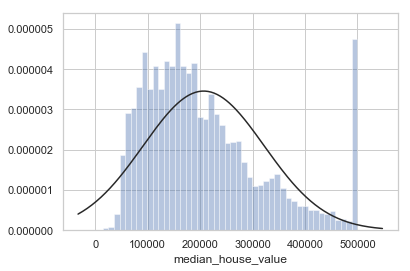

In [15]:
from scipy.stats import norm
ax = sns.distplot(df['median_house_value'], fit=norm, kde=False)

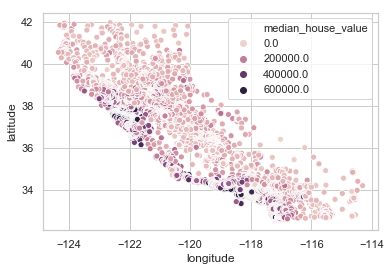

In [16]:
ax = sns.scatterplot(x="longitude", y="latitude",hue="median_house_value",data=df)

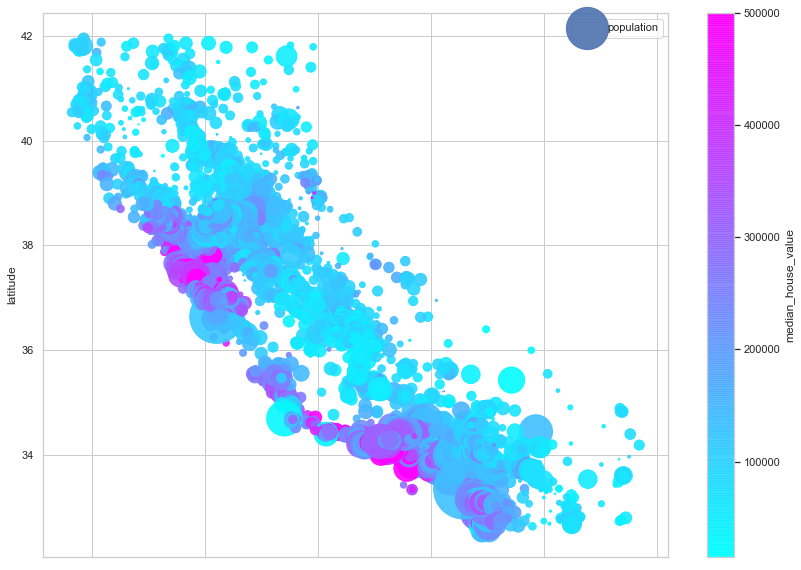

In [17]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.9, 
    s=df['population']/10, label='population', figsize=(14,10), 
    c='median_house_value', cmap=plt.get_cmap('cool'), colorbar=True)

In [18]:
df.groupby(["ocean_proximity"])["median_house_value"].mean()

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64

In [19]:
temp2 = df.pivot_table(values='median_house_value',index=['ocean_proximity'])
print(temp2)

                 median_house_value
ocean_proximity                    
<1H OCEAN             240084.285464
INLAND                124805.392001
ISLAND                380440.000000
NEAR BAY              259212.311790
NEAR OCEAN            249433.977427


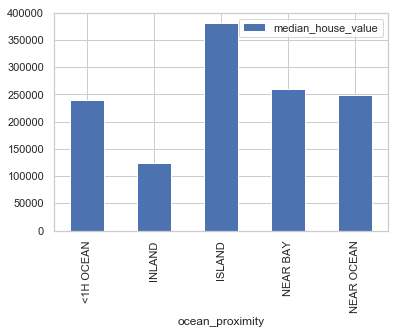

In [20]:
temp2.plot(kind = 'bar')

we can see from the groups and data inland houses seem to have a much lover mean and medium house value suggesting the closer to the coast a block of houses are the higher the medium value and islands seem to contain outlier values, ocean proximity could possibly be a useful feature in predicting the house value

In [21]:
len(df)

20640

In [22]:
df = df[df["ocean_proximity"] != "ISLAND"]

In [23]:
len(df)

20635

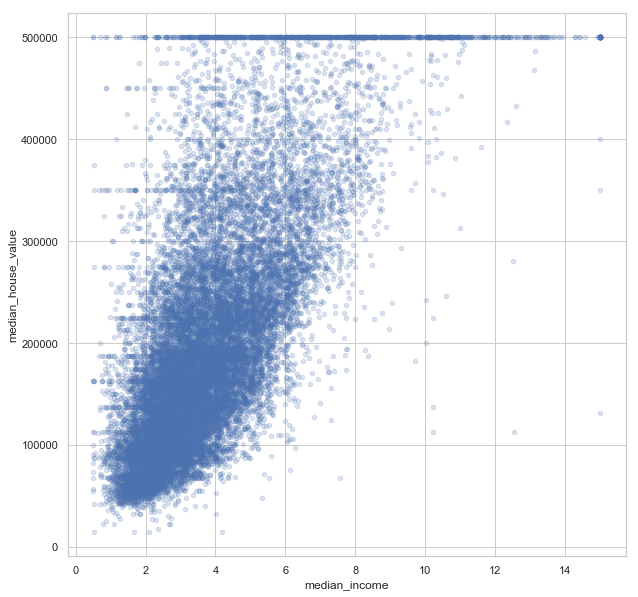

In [24]:
df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2, figsize=(10,10))

here we see serval large horixonal lines in the scatter the largest of which is 500000 we will remove rows with 500000 to balalance the distribution a bit

In [25]:
df = df[df["median_house_value"] < 499000]

In [26]:
len(df)

19641

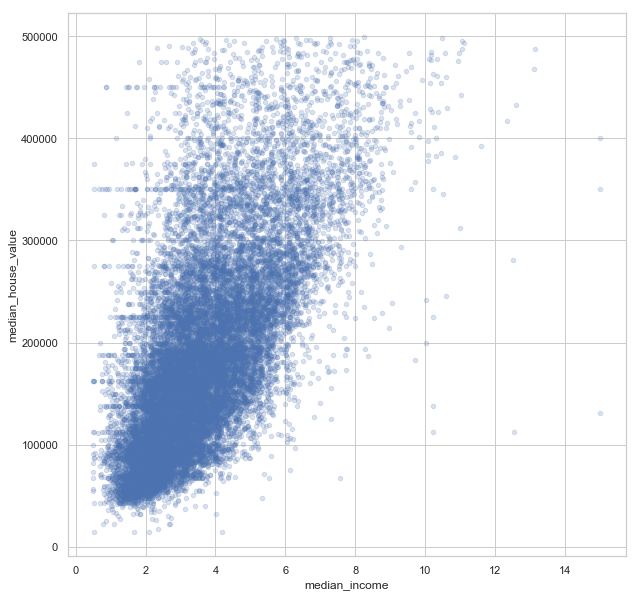

In [27]:
df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2, figsize=(10,10))

Since there is opnly 5 island districts and they are large outlier value we will remove islands from the dataset

In [28]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']

# checkout the correlations again
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.647179
total_rooms            0.145262
rooms_per_household    0.111415
households             0.096016
total_bedrooms         0.075045
housing_median_age     0.064794
population             0.014024
longitude             -0.046022
latitude              -0.148925
bedrooms_per_room     -0.187864
Name: median_house_value, dtype: float64

D:\anacoda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


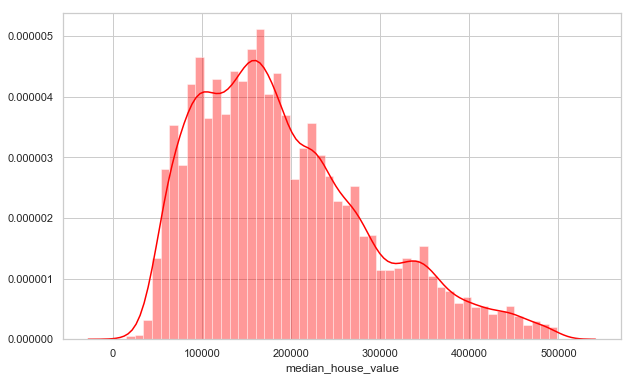

In [29]:
plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'],color='red')
plt.show()

removed the major outlier from before

In [30]:
#x=df.iloc[:,0:7].values
y = df.iloc[:,8].values
#print(df.iloc[:,8])
#df = df.drop(["median_house_value"], axis=1)

In [31]:
le = LabelEncoder()
#le.fit(df["ocean_proximity"])
#le.classes_
df["ocean_proximity"] = le.fit_transform(df["ocean_proximity"])

In [32]:
x = df.values

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  

  #Perform k-fold cross-validation with 10 folds
  kf = KFold(data.shape[0], n_folds=10)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

D:\anacoda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\anacoda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [34]:
#from sklearn.linear_model import LinearRegression
#outcome_var = 'median_house_value'
#predictor_var = ['ocean_proximity','rooms_per_household','median_income']
#model = LinearRegression()
#classification_model(model, df,predictor_var,outcome_var)

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
ypred = linear_regressor.predict(xtest)
ypred

array([169900.,  73800., 221500., ..., 184800., 133600., 170800.])

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error
predictions = linear_regressor.predict(xtest)
lin_mse = mean_squared_error(ytest,predictions)
lin_rmse = np.sqrt(lin_mse)
print('rmse value is : ',lin_rmse)

rmse value is :  1.173155631447488e-10


In [39]:
lin_reg_score = linear_regressor.score(xtest,ytest)
print('r squared value is : ',lin_reg_score )

r squared value is :  1.0


In [40]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state=0)
tree_regressor.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [41]:
y_pred = tree_regressor.predict(xtest)
y_pred

array([169900.,  73800., 221500., ..., 184800., 133600., 170800.])

In [42]:
tree_score = tree_regressor.score(xtest,ytest)
print('r squared value is : ',tree_score )

r squared value is :  0.9999993018597304


In [43]:
from sklearn.linear_model import LinearRegression
outcome_var = 'median_house_value'
predictor_var = ['ocean_proximity','rooms_per_household','median_income']
model = LinearRegression()
classification_model(model, df,predictor_var,outcome_var)

Cross-Validation Score : 24.359%


In [44]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2,6.281853,0.172096
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,2,4.761658,0.231774
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,2,4.931907,0.192899
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,2,4.797527,0.221327
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,2,4.294118,0.260274
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,2,4.970588,0.199211


In [ ]:
from sklearn.preprocessing import StandardScaler
df_copy = df.drop(["median_house_value"], axis=1)
scaler = StandardScaler()
tree_regressor = DecisionTreeRegressor(random_state=0)
model = RandomForestClassifier(n_estimators=25, min_samples_split=10, max_depth=7, max_features=1)
#predictor_var = ['wage-increase-first-year','statutory-holidays','wage-increase-second-year',
                 #'working-hours']
#classification_model(model, df,predictor_var,outcome_var)

#print(scaler.fit(df_copy))
y = df["median_house_value"].values
x = scaler.fit_transform(df_copy)
#print(x[:])
model.fit(x, y)
model.score(x,y)
kf = KFold(x.shape[0], n_folds=10)
error = []
error1 = []
for train, test in kf:
    model.fit(x[train], y[train])
    error.append(model.score(x[test], y[test]))
    tree_regressor.fit(x[train], y[train])
    error1.append(tree_regressor.score(x[test], y[test]))
    #print(x[train])
    #tree_regressor.fit(x[train],y[train])
    #ypred = linear_regressor.predict(x[test])
    #lin_mse = mean_squared_error(ytest,predictions)
    #lin_rmse = np.sqrt(lin_mse)
    #print('rmse value is : ',lin_rmse)
    
print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error1)))

In [ ]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()
#print(x[:, 9])
#x[:, 8] = labelencoder.fit_transform(x[:, 8])
#onehotencoder = OneHotEncoder(categorical_features = [8])
#x = onehotencoder.fit_transform(x).toarray()
df.head(5)

In [ ]:
x=scaler.fit_transform(df[["housing_median_age","ocean_proximity","median_income","bedrooms_per_room",
                          "population","rooms_per_household"]].values)
print(x)

y=df['median_house_value'].values
print(y)

model = LinearRegression()
kf = KFold(x.shape[0], n_folds=10)
error = []

for train, test in kf:
    model.fit(x[train], y[train])
    error.append(model.score(x[test], y[test]))
    print(y[test])
    print(model.predict(x[test]))
print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
